# DL EXP 8 : CNN to recognize handwritten digits

In [10]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = X_train / 255
X_test = X_test / 255

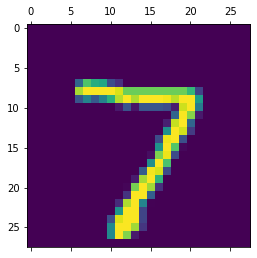

In [11]:
plt.matshow(X_test[0])

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [7]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [8]:
convolutional_neural_network = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [9]:
convolutional_neural_network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
convolutional_neural_network.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 58s 30ms/step - loss: 0.2211 - accuracy: 0.9326
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0734 - accuracy: 0.9776
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0548 - accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0419 - accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0351 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0277 - accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0231 - accuracy: 0.9931
Epoch 8/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0192 - accuracy: 0.9941
Epoch 9/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0164 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 51s 27m

In [12]:
convolutional_neural_network.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0570 - accuracy: 0.9859


[0.056973278522491455, 0.9858999848365784]

In [13]:
y_predicted_by_model = convolutional_neural_network.predict(X_test)
y_predicted_by_model[0]   #getting probability score for each class digits

313/313 [==============================] - 5s 15ms/step


array([1.2078283e-07, 5.4993876e-07, 2.0369849e-07, 1.9932694e-08,
       7.0972908e-09, 2.8125341e-10, 3.1638015e-15, 9.9999899e-01,
       5.3020411e-11, 1.3381870e-08], dtype=float32)

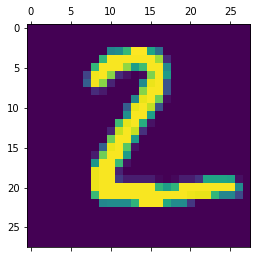

In [19]:
plt.matshow(X_test[1])

In [20]:
y_predicted_by_model[1]

array([1.5846422e-06, 6.1425492e-10, 9.9999827e-01, 5.0472181e-08,
       9.2467243e-09, 1.1203098e-12, 4.2226461e-08, 1.3774293e-08,
       1.3588680e-08, 8.5156660e-10], dtype=float32)

In [21]:
np.argmax(y_predicted_by_model[1])

2

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted_by_model]

In [17]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]